In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

### Laplaciano

In [4]:
def Laplacian(M,x,y,dx,dy):
    N = M.copy() # No vamos reescribiendo la matriz con nuevos valores a.k.a Metodo de Jacobi
    for i in range(1,len(y)-1):
        for j in range(1,len(x)-1):
            Mxx = (M[i][j+1] + M[i][j-1] - 2*M[i][j]) / (dx**2)
            Myy = (M[i+1][j] + M[i-1][j] - 2*M[i][j]) / (dy**2)
            N[i][j] = Mxx + Myy
    return  N

def VectorizedLaplacian(M,dx,dy):
    Interior = M[1:-1,1:-1] # No podemos aplicar el laplaciano en el borde, pues nos saldriamos del grid
    Izq = M[1:-1,0:-2]  # x-h
    Der = M[1:-1,2:]  # x+h
    Sup = M[0:-2,1:-1]  # y-h
    Inf = M[2:,1:-1] # y+h
    Mxx = (Izq + Der - 2*Interior) / (dx**2)
    Myy = (Sup + Inf - 2*Interior) / (dy**2)
    return Mxx + Myy

def LocalLaplacian(M,x,y):
    N = M.copy() # No vamos reescribiendo la matriz con nuevos valores a.k.a Metodo de Jacobi
    for i in range(1,len(y)-1):
        for j in range(1,len(x)-1):
            N[i][j] = M[i][j+1] + M[i][j-1] + M[i+1][j] + M[i-1][j] - 4*M[i][j]
    return  N

def VectorizedLocalLaplacian(M):
    Interior = M[1:-1,1:-1] # No podemos aplicar el laplaciano en el borde, pues nos saldriamos del grid
    Izq = M[1:-1,0:-2]  # x-h
    Der = M[1:-1,2:]  # x+h
    Sup = M[0:-2,1:-1]  # y-h
    Inf = M[2:,1:-1] # y+h
    return Izq + Der + Sup + Inf - 4*Interior

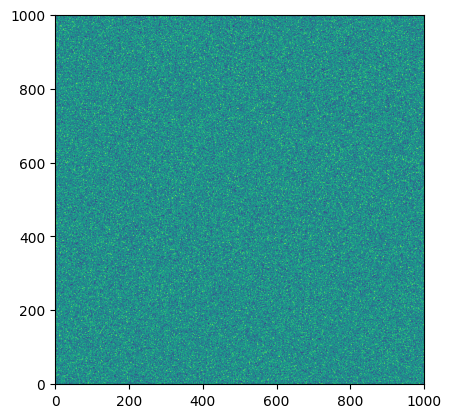

In [5]:
# Parametros de la simulacion
dx = 0.001
dy = 0.001
x=np.arange(0,1+dx,dx)
y=np.arange(0,1+dy,dy)
A=np.random.rand(len(y),len(x))
plt.imshow(A,origin="lower")
plt.show()

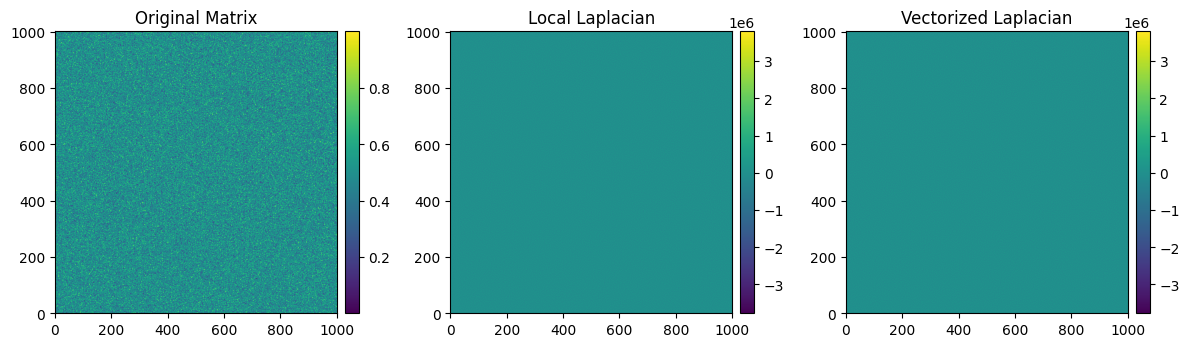

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [6]:
B=A.copy()
C=A.copy()

B = Laplacian(A,x,y,dx,dy)
C[1:-1,1:-1] = VectorizedLaplacian(A,dx,dy)

fig, axes = plt.subplots(1,3,figsize=(12,10),layout="tight")
axes[0].set_title("Original Matrix")
im1 = axes[0].imshow(A,origin="lower")
divider1 = make_axes_locatable(axes[0])
cax1 = divider1.append_axes("right", size="5%", pad=0.08)
plt.colorbar(im1, cax=cax1)

axes[1].set_title("Local Laplacian")
im2 = axes[1].imshow(B,origin="lower")
divider2 = make_axes_locatable(axes[1])
cax2 = divider2.append_axes("right", size="5%", pad=0.08)
plt.colorbar(im2, cax=cax2)

axes[2].set_title("Vectorized Laplacian")
im3 = axes[2].imshow(C,origin="lower")
divider3 = make_axes_locatable(axes[2])
cax3 = divider3.append_axes("right", size="5%", pad=0.08)
plt.colorbar(im3, cax=cax3)
plt.show()
B==C

### La celula

La celula esta descrite por el sistema de ecuaciones 
$$
\begin{align}
&q(\varphi) = b\varphi + 0.5(a-b)\big(|\varphi+1|-|\varphi-1|\big)  \\
&C\,\frac{dV}{dt} = - I - \frac{dq}{d\varphi} + GV  \\
&L\frac{dI}{dt} = V \\ 
&\frac{d\varphi}{dt} = V
\end{align}
$$
En nuevas variables
$$
\boxed{
\begin{align*}
&\frac{dX}{dt} = \alpha\bigg[- Y - X\cdot W\big(Z\big) + \gamma X\bigg] \\ 
&\frac{dY}{dt} = \beta X \\
&\frac{dZ}{dt} = X
\end{align*}}
$$
Las dos ultimas ecuaciones implican
$$
\begin{align}
&\frac{dY}{dt} - \beta\frac{dZ}{dt} = 0 \\
&Z=\frac{Y + \kappa}{\beta}
\end{align}
$$
Podemos entonces describir el sistema con las 2 ecuaciones de orden 1
$$
\begin{align}
&\frac{dX}{dt} = \alpha\bigg[- Y - X\cdot W\bigg(\frac{Y+\kappa}{\beta}\bigg) + \gamma X\bigg] \\ 
&\frac{dY}{dt} = \beta X \\
\end{align}
$$
O con la ecuacion de segundo orden 
$$
\begin{align}
&\frac{1}{\beta}\frac{d^2Y}{dt} = \alpha\bigg[- Y - \frac{1}{\beta}\frac{dY}{dt}\cdot W\bigg(\frac{Y+\kappa}{\beta}\bigg) + \gamma \frac{1}{\beta}\frac{dY}{dt}\bigg] \\ 
&\frac{d^2Y}{dt} = -\alpha\beta Y -\alpha\bigg[W\bigg(\frac{Y+\kappa}{\beta}\bigg)-\gamma\bigg]\frac{dY}{dt}
\\
&\frac{d^2Y}{dt} + \alpha\bigg[W\bigg(\frac{Y+\kappa}{\beta}\bigg)-\gamma\bigg]\frac{dY}{dt} + \alpha\beta Y = 0
\end{align}
$$



#### Comportamiento oscilatorio

In [7]:
def Memductance(flux,a,b):
    return a if np.abs(flux)<1 else b

Memductance = np.vectorize(Memductance)

A=[0.6,8,10,0.3]
B=Memductance(A,0,1)
print(B)

def F(t,X,Y,alpha,beta,gamma,a,b):
    return alpha*(-Y-X*Memductance(Y/beta,a,b)+gamma*X)

def G(t,X,Y,beta):
    return beta*X

def RK4_Coupled(F,G,h,Range:tuple,InitCond):
    t=Range[0]
    tmax=Range[1]
    x=InitCond[0]
    y=InitCond[1]
    X=[x]
    Y=[y]
    T=[t]
    # Generacion de datos
    while t<=tmax:
        k1x=F(t , x , y)
        k1y=G(t , x , y)
        k2x=F(t + 0.5*h , x + 0.5*h*k1x , y + 0.5*h*k1y)
        k2y=G(t + 0.5*h , x + 0.5*h*k1x , y + 0.5*h*k1y)
        k3x=F(t + 0.5*h , x + 0.5*h*k2x , y + 0.5*h*k2y)
        k3y=G(t + 0.5*h , x + 0.5*h*k2x , y + 0.5*h*k2y)
        k4x=F(t + h , x + k3x*h , y + k3y*h)
        k4y=G(t + h , x + k3x*h , y + k3y*h)
        x+=(h/6)*(k1x + 2*k2x + 2*k3x + k4x)
        y+=(h/6)*(k1y + 2*k2y + 2*k3y + k4y)
        t+=h 
        X.append(x)
        Y.append(y)
        T.append(t)

    return T,X,Y

[0 1 1 0]


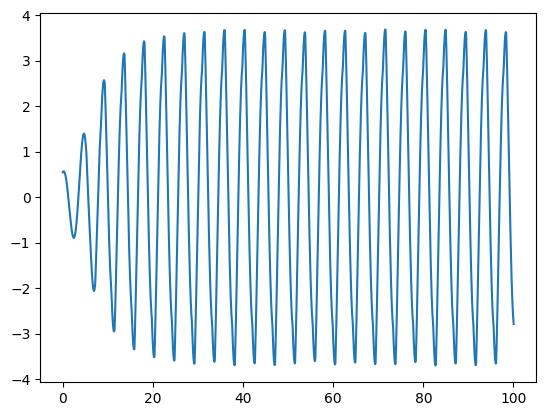

In [6]:
# Parametros del sistema
alpha = 2
beta = 1
gamma = 0.3
a = 0.1
b = 0.5
X0 = np.random.rand()
Y0 = 0

# Solucion del sistema de ecuaciones
F1 = lambda t,X,Y: F(t,X,Y,alpha,beta,gamma,a,b)
G1 = lambda t,X,Y: G(t,X,Y,beta)
T , x , y = RK4_Coupled(F1,G1,0.05,[0,100],[X0,Y0])

plt.plot(T,x)
plt.show()

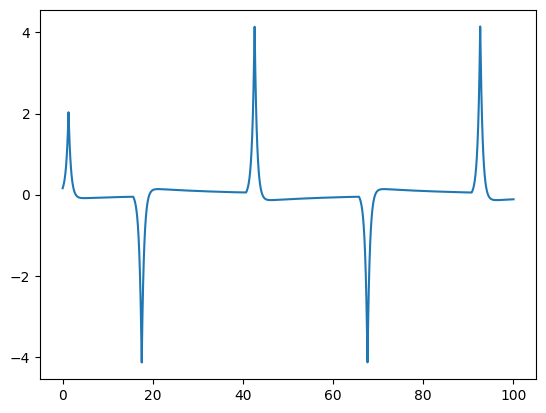

In [8]:
# Parametros del sistema
alpha = 10
beta = 0.01
gamma = 0.3
a = 0.1
b = 0.5
X0 = np.random.rand()
Y0 = 0

# Solucion del sistema de ecuaciones
F1 = lambda t,X,Y: F(t,X,Y,alpha,beta,gamma,a,b)
G1 = lambda t,X,Y: G(t,X,Y,beta)
T , x , y = RK4_Coupled(F1,G1,0.05,[0,100],[X0,Y0])

plt.plot(T,x)
plt.show()

### Red Neuronal Celular

Un sistema de reaccion difusion de dos componente que incluya difusion __cruzada__ toma la forma 
$$
\begin{align}
\begin{bmatrix}
   \dot{X} \\
   \dot{Y}
\end{bmatrix}
=
\begin{bmatrix}
   D_{\,1\,1} & D_{\,1\,2} \\
   D_{\,2\,1} & D_{\,2\,2}
\end{bmatrix}
\begin{bmatrix}
   \nabla^2 X \\
   \nabla^2 Y
\end{bmatrix}
+
\begin{bmatrix}
   f(X,Y) \\
   g(X,Y)
\end{bmatrix}
\end{align}
$$
Tomando 
$$
\begin{align}
&f(X,Y) = \alpha\bigg[ - Y - X\cdot W\bigg(\frac{Y+\kappa}{\beta}\bigg) + \gamma X \bigg] \\
&g(X,Y) = \beta X
\end{align}
$$
Obtenemos el sistema de ecuaciones 
$$ 
\begin{align}
&\dot{X} = D_{\,1\,1} \nabla^2 X + D_{\,1\,2} \nabla^2 Y + \alpha\bigg[ - Y - X\cdot W\bigg( \frac{Y+\kappa}{\beta} \bigg) + \gamma X \bigg] \\
&\dot{Y} = D_{\,2\,1} \nabla^2 X + D_{\,2\,2} \nabla^2 Y + \beta X
\end{align}
$$
Empleando diferencias forward en el tiempo con la discretizacion $ t \rightarrow n=1,\dots,K$ y discretizando el espacio $y\rightarrow i=1,\dots,M$ , $x\rightarrow i=1,\dots,N$
$$
\begin{align}
&X^{\,n+1}_{\,i\,,\,j} = X^{\,n}_{\,i\,,\,j} + dt\bigg[ D_{\,1\,1} \nabla^2 X + D_{\,1\,2} \nabla^2 Y\bigg] + \alpha\,dt\bigg[-Y^{\,n}_{\,i\,,\,j} - X^{\,n}_{\,i\,,\,j}\cdot W\bigg(\frac{Y^{\,n}_{\,i\,,\,j}+\kappa}{\beta}\bigg) + \gamma X^{\,n}_{\,i\,,\,j} \bigg] \\
&Y^{\,n+1}_{\,i\,,\,j} = Y^{\,n}_{\,i\,,\,j} + dt\bigg[ D_{\,2\,1} \nabla^2 X + D_{\,2\,2} \nabla^2 Y\bigg] + \beta\,dt\,X^{\,n}_{\,i\,,\,j}
\end{align} 
$$

### Autowaves

$$
\begin{align}
&X^{\,n+1}_{\,i\,,\,j} = X^{\,n}_{\,i\,,\,j} + dt\bigg[ D_{\,1\,1} \nabla^2 X \bigg] + \alpha\,dt \bigg[ - Y^{\,n}_{\,i\,,\,j} - X^{\,n}_{\,i\,,\,j}\cdot W\Big(Z^{\,n}_{\,i\,,\,j}\Big) + \gamma X^{\,n}_{\,i\,,\,j} \bigg] \\
&Y^{\,n+1}_{\,i\,,\,j} = Y^{\,n}_{\,i\,,\,j} + \beta\,dt\,X^{\,n}_{\,i\,,\,j} \\
&Z^{\,n+1}_{\,i\,,\,j} = \beta X^{\,n}_{\,i\,,\,j} 
\end{align} 
$$

#### Caso 1. Onda Plana

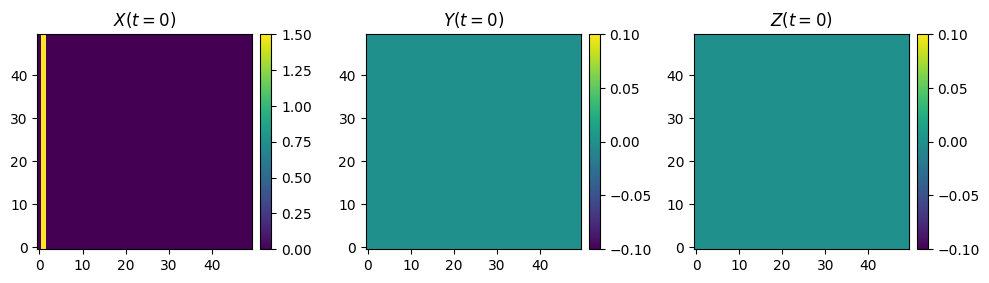

In [8]:
# Parametros del sistema
alpha = 10
beta = 0.01
gamma = 0.3
a = 0.1
b = 0.5
D11 = 0.51
D12 = 0
D21 = 0
D22 = 0

# Parametros de la simulacion
dt = 0.01
x = np.linspace(0,1,50)
y = np.linspace(0,1,50)
t = np.arange(0,14+dt,dt) 

# Condiciones Iniciales
Phi0 = np.zeros((len(y),len(x)))
Psi0 = np.zeros((len(y),len(x)))
Xi0 = np.zeros((len(y),len(x)))
Phi0[:,1] = 1.5

fig,axes = plt.subplots(1,3,figsize=(10,5),layout='tight')
im1 = axes[0].imshow(Phi0,origin='lower')
divider1 = make_axes_locatable(axes[0])
cax1 = divider1.append_axes("right", size="5%", pad=0.08)
axes[0].set_title(r"$X(t=0)$")
plt.colorbar(im1, cax=cax1)

im2 = axes[1].imshow(Psi0,origin='lower')
divider2 = make_axes_locatable(axes[1])
cax2 = divider2.append_axes("right", size="5%", pad=0.08)
axes[1].set_title(r"$Y(t=0)$")
plt.colorbar(im2, cax=cax2)

im3 = axes[2].imshow(Xi0,origin='lower')
divider3 = make_axes_locatable(axes[2])
cax3 = divider3.append_axes("right", size="5%", pad=0.08)
axes[2].set_title(r"$Z(t=0)$")
plt.colorbar(im3, cax=cax3)
plt.show()

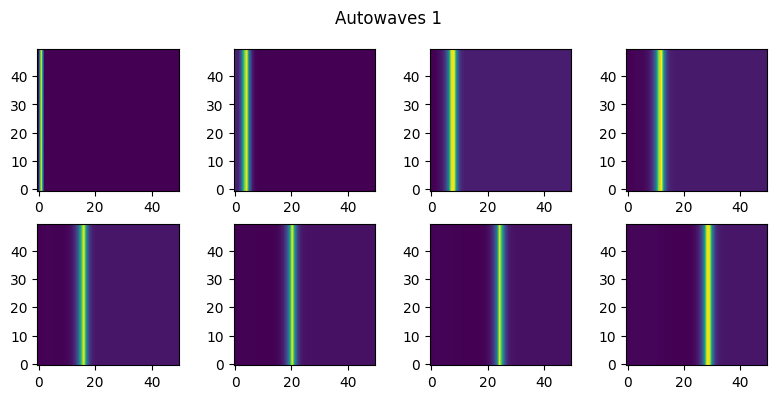

In [9]:
Phi = Phi0.copy()
Psi = Psi0.copy()
Xi = Xi0.copy()
# Donde guardaremos
PHI = np.zeros((len(t),len(y),len(x)))
PSI = np.zeros((len(t),len(y),len(x)))
XI = np.zeros((len(t),len(y),len(x)))

for n in range(len(t)): # Para un total de 10 segundos
    # Condiciones Neummann Homogeneas (Zero Flux)
    for M in (Phi,Psi,Xi):
        M[0,:] = M[1,:]
        M[-1,:] = M[-2,:]
        M[:,0] = M[:,1]
        M[:,-1] = M[:,-2]
        
    # Aplicamos la formula de recursion
    Phi_lap = VectorizedLocalLaplacian(Phi)
    Psi_lap = VectorizedLocalLaplacian(Psi)
    PhiInt = Phi[1:-1,1:-1]
    PsiInt = Psi[1:-1,1:-1]
    XiInt = Xi[1:-1,1:-1]
    Phi[1:-1,1:-1] = PhiInt + dt*(D11*Phi_lap + D12*Psi_lap) + alpha*dt*(-PsiInt - PhiInt * Memductance(XiInt, a , b) + gamma*PhiInt)
    Psi[1:-1,1:-1] = PsiInt + dt*(D21*Phi_lap + D22*Psi_lap) + dt*beta*PhiInt
    Xi[1:-1,1:-1] = XiInt + dt*PhiInt

    PHI[n] += Phi
    PSI[n] += Psi
    XI[n] += Xi

Phi2 = PHI[int(2/dt)]
Phi4 = PHI[int(4/dt)]
Phi6 = PHI[int(6/dt)]
Phi8 = PHI[int(8/dt)]
Phi10 = PHI[int(10/dt)] 
Phi12 = PHI[int(12/dt)]

fig, ax = plt.subplots(2,4,figsize=(8,4),layout='tight')
ax[0][0].imshow(Phi0,cmap='viridis', origin='lower', interpolation='bilinear')
ax[0][1].imshow(Phi2,cmap='viridis', origin='lower', interpolation='bilinear')
ax[0][2].imshow(Phi4,cmap='viridis', origin='lower', interpolation='bilinear')
ax[0][3].imshow(Phi6,cmap='viridis', origin='lower', interpolation='bilinear')
ax[1][0].imshow(Phi8,cmap='viridis', origin='lower', interpolation='bilinear')
ax[1][1].imshow(Phi10,cmap='viridis', origin='lower', interpolation='bilinear')
ax[1][2].imshow(Phi12,cmap='viridis', origin='lower', interpolation='bilinear')
ax[1][3].imshow(Phi,cmap='viridis', origin='lower', interpolation='bilinear')
fig.suptitle("Autowaves 1")
plt.show()

#### Caso 2. Dos Ondas Planas Paralelas

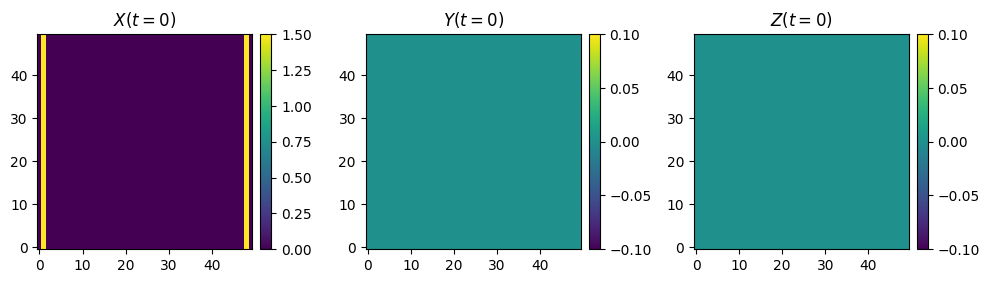

In [10]:
# Parametros del sistema
alpha = 10
beta = 0.01
gamma = 0.3
a = 0.1
b = 0.5
D11 = 0.51
D12 = 0
D21 = 0
D22 = 0

# Parametros de la simulacion
dt = 0.005
x = np.linspace(0,1,50)
y = np.linspace(0,1,50)
t = np.arange(0,15+dt,dt) 

# Condiciones Iniciales
Phi0 = np.zeros((len(y),len(x)))
Psi0 = np.zeros((len(y),len(x)))
Xi0 = np.zeros((len(y),len(x)))
Phi0[:,1] = 1.5
Phi0[:,-2] = 1.5

fig,axes = plt.subplots(1,3,figsize=(10,5),layout='tight')
im1 = axes[0].imshow(Phi0,origin='lower')
divider1 = make_axes_locatable(axes[0])
cax1 = divider1.append_axes("right", size="5%", pad=0.08)
axes[0].set_title(r"$X(t=0)$")
plt.colorbar(im1, cax=cax1)

im2 = axes[1].imshow(Psi0,origin='lower')
divider2 = make_axes_locatable(axes[1])
cax2 = divider2.append_axes("right", size="5%", pad=0.08)
axes[1].set_title(r"$Y(t=0)$")
plt.colorbar(im2, cax=cax2)

im3 = axes[2].imshow(Xi0,origin='lower')
divider3 = make_axes_locatable(axes[2])
cax3 = divider3.append_axes("right", size="5%", pad=0.08)
axes[2].set_title(r"$Z(t=0)$")
plt.colorbar(im3, cax=cax3)
plt.show()

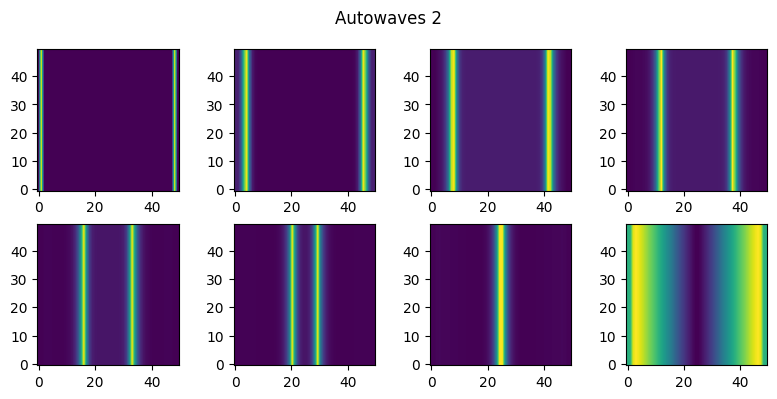

In [11]:
Phi = Phi0.copy()
Psi = Psi0.copy()
Xi = Xi0.copy()
# Donde guardaremos
PHI = np.zeros((len(t),len(y),len(x)))
PSI = np.zeros((len(t),len(y),len(x)))
XI = np.zeros((len(t),len(y),len(x)))

for n in range(len(t)): # Para un total de 10 segundos
    # Condiciones Neummann Homogeneas (Zero Flux)
    for M in (Phi,Psi,Xi):
        M[0,:] = M[1,:]
        M[-1,:] = M[-2,:]
        M[:,0] = M[:,1]
        M[:,-1] = M[:,-2]
        
    # Aplicamos la formula de recursion
    Phi_lap = VectorizedLocalLaplacian(Phi)
    Psi_lap = VectorizedLocalLaplacian(Psi)
    PhiInt = Phi[1:-1,1:-1]
    PsiInt = Psi[1:-1,1:-1]
    XiInt = Xi[1:-1,1:-1]
    Phi[1:-1,1:-1] = PhiInt + dt*(D11*Phi_lap + D12*Psi_lap) + alpha*dt*(-PsiInt - PhiInt * Memductance(XiInt, a , b) + gamma*PhiInt)
    Psi[1:-1,1:-1] = PsiInt + dt*(D21*Phi_lap + D22*Psi_lap) + dt*beta*PhiInt
    Xi[1:-1,1:-1] = XiInt + dt*PhiInt

    PHI[n] += Phi
    PSI[n] += Psi
    XI[n] += Xi

Phi2 = PHI[int(2/dt)]
Phi4 = PHI[int(4/dt)]
Phi6 = PHI[int(6/dt)]
Phi8 = PHI[int(8/dt)]
Phi10 = PHI[int(10/dt)] 
Phi12 = PHI[int(12/dt)]
Phi14 = PHI[int(15/dt)]

fig, ax = plt.subplots(2,4,figsize=(8,4),layout='tight')
ax[0][0].imshow(Phi0,cmap='viridis', origin='lower', interpolation='bilinear')
ax[0][1].imshow(Phi2,cmap='viridis', origin='lower', interpolation='bilinear')
ax[0][2].imshow(Phi4,cmap='viridis', origin='lower', interpolation='bilinear')
ax[0][3].imshow(Phi6,cmap='viridis', origin='lower', interpolation='bilinear')
ax[1][0].imshow(Phi8,cmap='viridis', origin='lower', interpolation='bilinear')
ax[1][1].imshow(Phi10,cmap='viridis', origin='lower', interpolation='bilinear')
ax[1][2].imshow(Phi12,cmap='viridis', origin='lower', interpolation='bilinear')
ax[1][3].imshow(Phi14,cmap='viridis', origin='lower', interpolation='bilinear')
fig.suptitle("Autowaves 2")
plt.show()

#### Caso 3. Onda Esferica

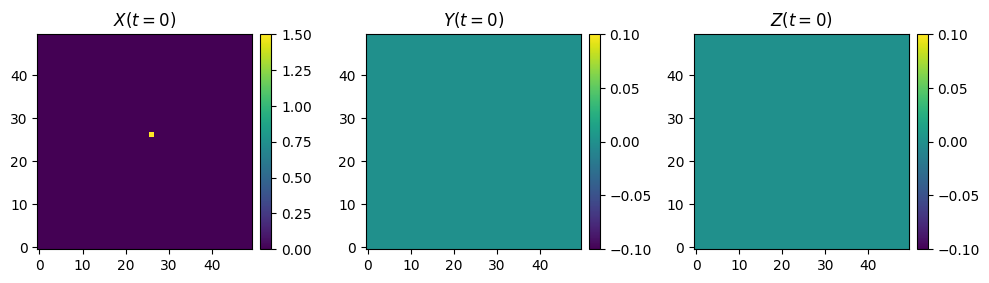

In [12]:
# Parametros del sistema
alpha = 10
beta = 0.01
gamma = 0.3
a = 0.1
b = 0.5
D11 = 0.51
D12 = 0
D21 = 0
D22 = 0

# Parametros de la simulacion
dt = 0.01
x = np.linspace(0,1,50)
y = np.linspace(0,1,50)
t = np.arange(0,14+dt,dt)  

# Condiciones Iniciales
Phi0 = np.zeros((len(y),len(x)))
Psi0 = np.zeros((len(y),len(x)))
Xi0 = np.zeros((len(y),len(x)))
Phi0[26][26] = 1.5

fig,axes = plt.subplots(1,3,figsize=(10,5),layout='tight')
im1 = axes[0].imshow(Phi0,origin='lower')
divider1 = make_axes_locatable(axes[0])
cax1 = divider1.append_axes("right", size="5%", pad=0.08)
axes[0].set_title(r"$X(t=0)$")
plt.colorbar(im1, cax=cax1)

im2 = axes[1].imshow(Psi0,origin='lower')
divider2 = make_axes_locatable(axes[1])
cax2 = divider2.append_axes("right", size="5%", pad=0.08)
axes[1].set_title(r"$Y(t=0)$")
plt.colorbar(im2, cax=cax2)

im3 = axes[2].imshow(Xi0,origin='lower')
divider3 = make_axes_locatable(axes[2])
cax3 = divider3.append_axes("right", size="5%", pad=0.08)
axes[2].set_title(r"$Z(t=0)$")
plt.colorbar(im3, cax=cax3)
plt.show()

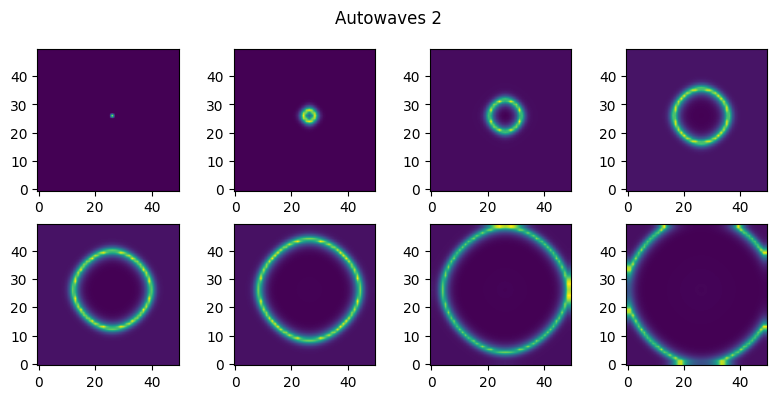

In [13]:
Phi = Phi0.copy()
Psi = Psi0.copy()
Xi = Xi0.copy()
PHI = np.zeros((len(t),len(y),len(x)))
PSI = np.zeros((len(t),len(y),len(x)))
XI = np.zeros((len(t),len(y),len(x)))
for n in range(len(t)): # Para un total de 10 segundos
    # Aplicamos la formula de recursion
    Phi_lap = VectorizedLocalLaplacian(Phi)
    Psi_lap = VectorizedLocalLaplacian(Psi)
    PhiInt = Phi[1:-1,1:-1]
    PsiInt = Psi[1:-1,1:-1]
    XiInt = Xi[1:-1,1:-1]
    Phi[1:-1,1:-1] = PhiInt + dt*(D11*Phi_lap + D12*Psi_lap) + dt*alpha*(-PsiInt - PhiInt * Memductance(XiInt, a , b) + gamma*PhiInt)
    Psi[1:-1,1:-1] = PsiInt + dt*(D21*Phi_lap + D22*Psi_lap) + dt*beta*PhiInt
    Xi[1:-1,1:-1] = XiInt + dt*PhiInt

    # Condiciones Neummann Homogeneas (Zero Flux)
    for M in (Phi,Psi,Xi):
        M[0,:] = M[1,:]
        M[-1,:] = M[-2,:]
        M[:,0] = M[:,1]
        M[:,-1] = M[:,-2]
    
    PHI[n] += Phi
    PSI[n] += Psi
    XI[n] += Xi

Phi2 = PHI[int(2/dt)]
Phi4 = PHI[int(4/dt)]
Phi6 = PHI[int(6/dt)]
Phi8 = PHI[int(8/dt)]
Phi10 = PHI[int(10/dt)] 
Phi12 = PHI[int(12/dt)]

fig, ax = plt.subplots(2,4,figsize=(8,4),layout='tight')
ax[0][0].imshow(Phi0,cmap='viridis', origin='lower', interpolation='bilinear')
ax[0][1].imshow(Phi2,cmap='viridis', origin='lower', interpolation='bilinear')
ax[0][2].imshow(Phi4,cmap='viridis', origin='lower', interpolation='bilinear')
ax[0][3].imshow(Phi6,cmap='viridis', origin='lower', interpolation='bilinear')
ax[1][0].imshow(Phi8,cmap='viridis', origin='lower', interpolation='bilinear')
ax[1][1].imshow(Phi10,cmap='viridis', origin='lower', interpolation='bilinear')
ax[1][2].imshow(Phi12,cmap='viridis', origin='lower', interpolation='bilinear')
ax[1][3].imshow(Phi,cmap='viridis', origin='lower', interpolation='bilinear')
fig.suptitle("Autowaves 2")
plt.show()

#### Caso 4. Ondas Esfericas Simetricas

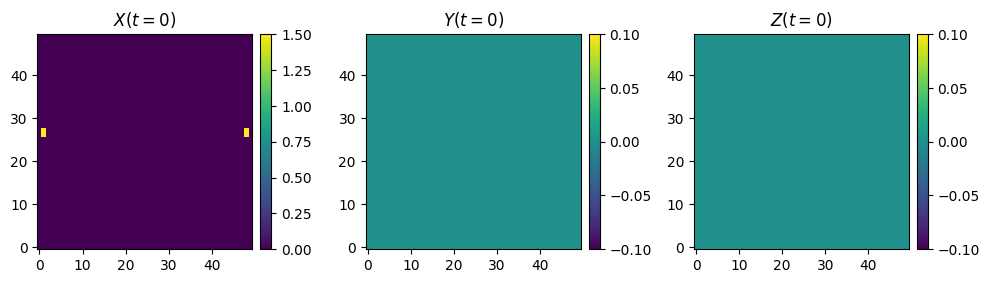

In [14]:
# Parametros del sistema
alpha = 10
beta = 0.01
gamma = 0.3
a = 0.1
b = 0.5
D11 = 0.51
D12 = 0
D21 = 0
D22 = 0

# Parametros de la simulacion
dt = 0.01
x = np.linspace(0,1,50)
y = np.linspace(0,1,50)
t = np.arange(0,10+dt,dt) 

Phi0 = np.zeros((len(y),len(x)))
Psi0 = np.zeros((len(y),len(x)))
Xi0 = np.zeros((len(y),len(x)))

Phi0[26][1] = 1.5
Phi0[27][1] = 1.5
Phi0[26][48] = 1.5
Phi0[27][48] = 1.5

fig,axes = plt.subplots(1,3,figsize=(10,5),layout='tight')
im1 = axes[0].imshow(Phi0,origin='lower')
divider1 = make_axes_locatable(axes[0])
cax1 = divider1.append_axes("right", size="5%", pad=0.08)
axes[0].set_title(r"$X(t=0)$")
plt.colorbar(im1, cax=cax1)

im2 = axes[1].imshow(Psi0,origin='lower')
divider2 = make_axes_locatable(axes[1])
cax2 = divider2.append_axes("right", size="5%", pad=0.08)
axes[1].set_title(r"$Y(t=0)$")
plt.colorbar(im2, cax=cax2)

im3 = axes[2].imshow(Xi0,origin='lower')
divider3 = make_axes_locatable(axes[2])
cax3 = divider3.append_axes("right", size="5%", pad=0.08)
axes[2].set_title(r"$Z(t=0)$")
plt.colorbar(im3, cax=cax3)
plt.show()

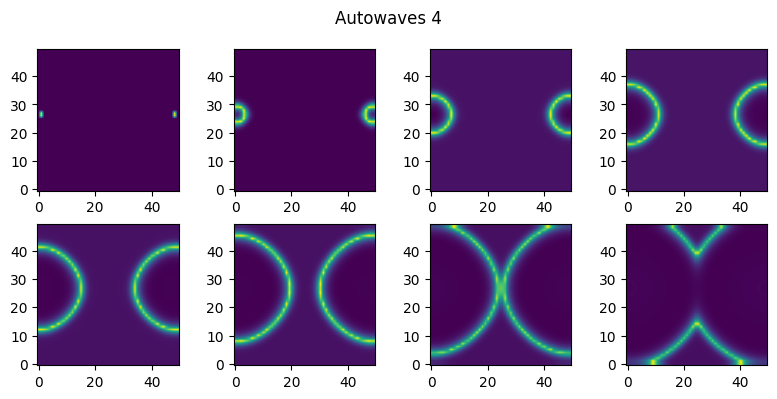

In [15]:
Phi = Phi0.copy()
Psi = Psi0.copy()
Xi = Xi0.copy()
t = np.arange(0,14+dt,dt)
PHI = np.zeros((len(t),len(y),len(x)))
PSI = np.zeros((len(t),len(y),len(x)))
XI = np.zeros((len(t),len(y),len(x)))

for n in range(len(t)): # Para un total de 10 segundos
    # Aplicamos la formula de recursion
    Phi_lap = VectorizedLocalLaplacian(Phi)
    Psi_lap = VectorizedLocalLaplacian(Psi)
    PhiInt = Phi[1:-1,1:-1]
    PsiInt = Psi[1:-1,1:-1]
    XiInt = Xi[1:-1,1:-1]
    Phi[1:-1,1:-1] = PhiInt + dt*(D11*Phi_lap + D12*Psi_lap) + dt*alpha*(-PsiInt - PhiInt * Memductance(XiInt, a , b) + gamma*PhiInt)
    Psi[1:-1,1:-1] = PsiInt + dt*(D21*Phi_lap + D22*Psi_lap) + dt*beta*PhiInt
    Xi[1:-1,1:-1] = XiInt + dt*PhiInt

    # Condiciones Neummann Homogeneas (Zero Flux)
    for M in (Phi,Psi,Xi):
        M[0,:] = M[1,:]
        M[-1,:] = M[-2,:]
        M[:,0] = M[:,1]
        M[:,-1] = M[:,-2]
    
    PHI[n] += Phi
    PSI[n] += Psi
    XI[n] += Xi

Phi2 = PHI[int(2/dt)]
Phi4 = PHI[int(4/dt)]
Phi6 = PHI[int(6/dt)]
Phi8 = PHI[int(8/dt)]
Phi10 = PHI[int(10/dt)] 
Phi12 = PHI[int(12/dt)]

fig, ax = plt.subplots(2,4,figsize=(8,4),layout='tight')
ax[0][0].imshow(Phi0,cmap='viridis', origin='lower', interpolation='bilinear')
ax[0][1].imshow(Phi2,cmap='viridis', origin='lower', interpolation='bilinear')
ax[0][2].imshow(Phi4,cmap='viridis', origin='lower', interpolation='bilinear')
ax[0][3].imshow(Phi6,cmap='viridis', origin='lower', interpolation='bilinear')
ax[1][0].imshow(Phi8,cmap='viridis', origin='lower', interpolation='bilinear')
ax[1][1].imshow(Phi10,cmap='viridis', origin='lower', interpolation='bilinear')
ax[1][2].imshow(Phi12,cmap='viridis', origin='lower', interpolation='bilinear')
ax[1][3].imshow(Phi,cmap='viridis', origin='lower', interpolation='bilinear')
fig.suptitle("Autowaves 4")
plt.show()

### Turing Patterns
$$
\begin{align}
&X^{\,n+1}_{\,i\,,\,j} = X^{\,n}_{\,i\,,\,j} + dt\bigg[ D_{\,1\,1} \nabla^2 X + D_{\,1\,2} \nabla^2 Y\bigg] + \alpha\,dt\bigg[ - Y^{\,n}_{\,i\,,\,j} \textcolor{red}{\pm} X^{\,n}_{\,i\,,\,j}\cdot W\bigg(\frac{Y^{\,n}_{\,i\,,\,j}}{\beta}+C\bigg) + \textcolor{red}{\gamma X^{\,n}_{\,i\,,\,j}} \bigg] \\
&Y^{\,n+1}_{\,i\,,\,j} = Y^{\,n}_{\,i\,,\,j} + dt\bigg[ D_{\,2\,1} \nabla^2 X + D_{\,2\,2} \nabla^2 Y\bigg] + \beta\,dt\,X^{\,n}_{\,i\,,\,j}
\end{align} 
$$

In [17]:
def AllTimeMCNN(Phi0,Psi0,alpha:float,beta:float,gamma:float,a:float,b:float,C,D:list):
    D11, D12, D21, D22 = D
    Phi = Phi0.copy()
    Psi = Psi0.copy()
    PHI = np.zeros((len(t),len(y),len(x)))
    PSI = np.zeros((len(t),len(y),len(x)))

    for n in range(len(t)): 
        # Aplicamos la formula de recursion
        Phi_lap = VectorizedLocalLaplacian(Phi)
        Psi_lap = VectorizedLocalLaplacian(Psi)

        PhiInt = Phi[1:-1,1:-1] 
        PsiInt = Psi[1:-1,1:-1] 
                                                                                    #####
        Phi[1:-1,1:-1] = PhiInt + dt*(D11*Phi_lap + D12*Psi_lap) + dt*alpha*( - PsiInt + PhiInt*Memductance(PsiInt/beta + C , a , b) + gamma*PhiInt)
        Psi[1:-1,1:-1] = PsiInt + dt*(D21*Phi_lap + D22*Psi_lap) + dt*beta*PhiInt

        # Condiciones Neummann Homogeneas (Zero Flux)
        for M in (Phi,Psi):
            M[0,:] = M[1,:]
            M[-1,:] = M[-2,:]
            M[:,0] = M[:,1]
            M[:,-1] = M[:,-2]
                
        PHI[n] += Phi
        PSI[n] += Psi
    
    return PHI , PSI


def MCNN(Phi0,Psi0,alpha:float,beta:float,gamma:float,a:float,b:float,C,D:list):
    D11, D12, D21, D22 = D
    Phi = Phi0.copy()
    Psi = Psi0.copy()

    for n in range(len(t)): 
        # Aplicamos la formula de recursion
        Phi_lap = VectorizedLocalLaplacian(Phi)
        Psi_lap = VectorizedLocalLaplacian(Psi)

        PhiInt = Phi[1:-1,1:-1] 
        PsiInt = Psi[1:-1,1:-1] 

        Phi[1:-1,1:-1] = PhiInt + dt*(D11*Phi_lap + D12*Psi_lap) + dt*alpha*( - PsiInt + PhiInt*Memductance(PsiInt/beta + C , a , b) + gamma*PhiInt)
        Psi[1:-1,1:-1] = PsiInt + dt*(D21*Phi_lap + D22*Psi_lap) + dt*beta*PhiInt

        # Condiciones Neummann Homogeneas (Zero Flux)
        for M in (Phi,Psi):
            M[0,:] = M[1,:]
            M[-1,:] = M[-2,:]
            M[:,0] = M[:,1]
            M[:,-1] = M[:,-2]
    
    return Phi , Psi

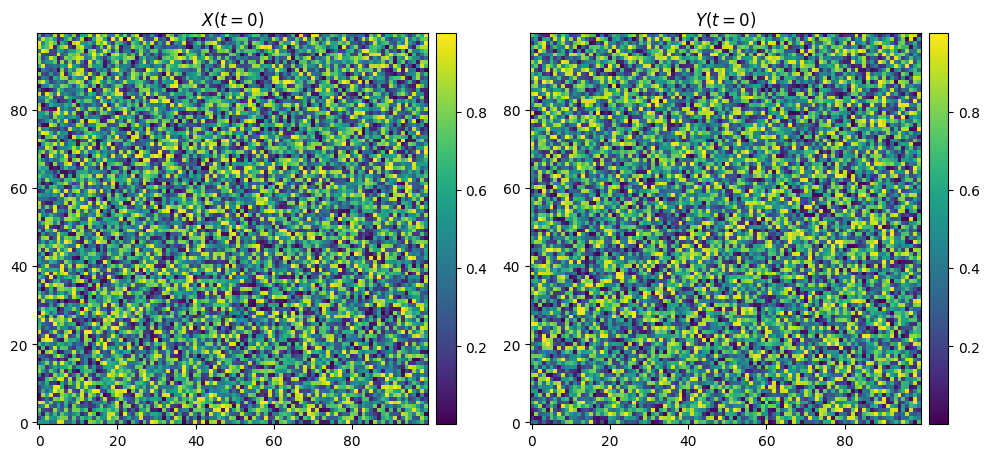

In [23]:
# Parametros del sistema
alpha = 1
beta = 0.8
gamma = 0
a = -0.01
b = -0.61
D11 = 1
D12 = 4
D21 = 6
D22 = 26
C1 = 0
C2 = 0.2
C3 = 0.5

# Parametros de la simulacion
dt = 0.001
x = np.linspace(0,1,100)
y = np.linspace(0,1,100)
t = np.arange(0,150+dt,dt) 

# Condiciones Iniciales
Phi0 = np.random.rand(len(y),len(x))
Psi0 = np.random.rand(len(y),len(x))

fig,axes = plt.subplots(1,2,figsize=(10,5),layout='tight')
im1 = axes[0].imshow(Phi0,origin='lower')
divider1 = make_axes_locatable(axes[0])
cax1 = divider1.append_axes("right", size="5%", pad=0.08)
axes[0].set_title(r"$X(t=0)$")
plt.colorbar(im1, cax=cax1)
im2 = axes[1].imshow(Psi0,origin='lower')
divider2 = make_axes_locatable(axes[1])
cax2 = divider2.append_axes("right", size="5%", pad=0.08)
axes[1].set_title(r"$Y(t=0)$")
plt.colorbar(im2, cax=cax2)
plt.show()

In [24]:
PHI1 , PSI1 = MCNN(Phi0, Psi0, alpha, beta, gamma, a, b, C1, [D11,D12,D21,D22])
PHI2 , PSI2 = MCNN(Phi0, Psi0, alpha, beta, gamma, a, b, C2, [D11,D12,D21,D22])
PHI3 , PSI3 = MCNN(Phi0, Psi0, alpha, beta, gamma, a, b, C3, [D11,D12,D21,D22])

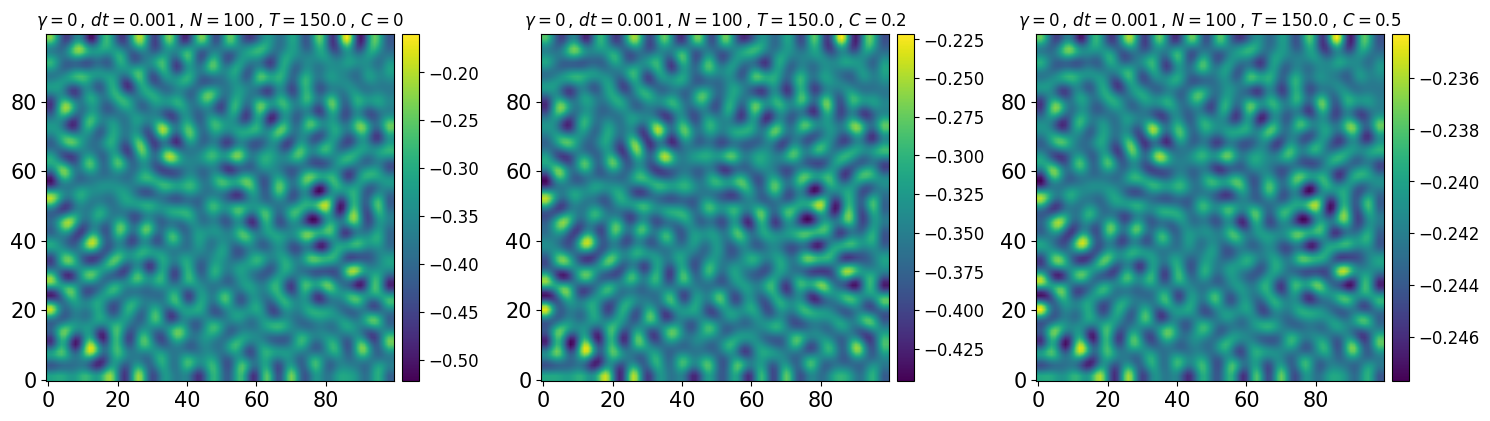

In [40]:
# Si no se especifico el signo se tomo -W(Y/b + C)
# Si no es especifico tamano se tomo 100x100

fig , axes = plt.subplots(1,3,figsize=(15,5),layout='tight')

im1 = axes[0].imshow(PHI1,origin='lower',interpolation='bilinear')
divider1 = make_axes_locatable(axes[0])
cax1 = divider1.append_axes("right", size="5%", pad=0.08)
axes[0].set_title(f"$\gamma={gamma}\,,\,dt={dt}\,,\,N={len(x)}\,,\,T={t[-1]}\,,\,C={C1}$")
cbar1 = plt.colorbar(im1, cax=cax1)
cbar1.ax.tick_params(labelsize=12) 

im2 = axes[1].imshow(PHI2,origin='lower',interpolation='bilinear')
divider2 = make_axes_locatable(axes[1])
cax2 = divider2.append_axes("right", size="5%", pad=0.08)
axes[1].set_title(f"$\gamma={gamma}\,,\,dt={dt}\,,\,N={len(x)}\,,\,T={t[-1]}\,,\,C={C2}$")
cbar2 = plt.colorbar(im2, cax=cax2)
cbar2.ax.tick_params(labelsize=12) 

im3 = axes[2].imshow(PHI3,origin='lower',interpolation='bilinear')
divider3 = make_axes_locatable(axes[2])
cax3 = divider3.append_axes("right", size="5%", pad=0.08)
axes[2].set_title(f"$\gamma={gamma}\,,\,dt={dt}\,,\,N={len(x)}\,,\,T={t[-1]}\,,\,C={C3}$")
cbar3 = plt.colorbar(im3, cax=cax3)
cbar3.ax.tick_params(labelsize=12) 

for ax in axes.flat:
        ax.tick_params(labelsize=15)

plt.show()